<a href="https://colab.research.google.com/github/DhasiM/nutrition_by_numbers/blob/development/Nutrition_By_Numbers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Goal and Description
The goal of the project was to create a database, build a regression model that uses informations from the database and create a dashboard to visualise important information.

# Data Cleaning

###Import Libraries

In [2]:
import pandas as pd
import numpy as np

### Import Dataset

In [44]:
weight = pd.read_csv("/content/sample_data/Weight.csv", sep=',')
food = pd.read_csv("/content/sample_data/Food.csv", sep=',')
exercise = pd.read_csv("/content/sample_data/Exercise.csv", sep=',')
#foods_calories = pd.read_csv("")
#activity_calories=pd.read_csv("")

In [45]:
#Rename 
food. rename(columns = {'Calories':'calories_in'}, inplace = True)
food.head(2)

,Date,calories_in,Carbohydrates,Fats,Proteins
0,6/13/2020,1427,206.70,52.26,35.92
1,6/14/2020,1525,192.09,65.92,37.79


In [46]:
#Rename 
exercise.rename(columns = {'Calories':'calories_out'}, inplace = True)
exercise.head(2)

,Date,calories_out
0,6/13/2020,2242
1,6/14/2020,2065


In [47]:
merged=pd.merge(left=food, right=exercise, how="left", left_on='Date', right_on="Date")
merged.head()

,Date,calories_in,Carbohydrates,Fats,Proteins,calories_out
0,6/13/2020,1427,206.70,52.26,35.92,2242.0
1,6/14/2020,1525,192.09,65.92,37.79,2065.0
2,6/15/2020,1414,200.99,49.17,43.74,2264.0
3,6/16/2020,1775,174.56,81.94,86.40,2121.0
4,6/17/2020,1866,217.32,75.88,42.17,2311.0


In [56]:
# Join the diet dataframes for 
my_data=pd.merge(left=merged, right=weight, how="left", left_on='Date', right_on="Date")
my_data.head()

,Date,calories_in,Carbohydrates,Fats,Proteins,calories_out,WeightP,WeightK
0,6/13/2020,1427,206.70,52.26,35.92,2242.0,NaN,NaN
1,6/14/2020,1525,192.09,65.92,37.79,2065.0,185.1883,84.0
2,6/15/2020,1414,200.99,49.17,43.74,2264.0,NaN,NaN
3,6/16/2020,1775,174.56,81.94,86.40,2121.0,NaN,NaN
4,6/17/2020,1866,217.32,75.88,42.17,2311.0,NaN,NaN


In [154]:
#Interpolate missing weight values
interpolated_data=my_data.interpolate(method='polynomial', limit_direction='forward', order=3)
interpolated_data.head()

,Date,calories_in,Carbohydrates,Fats,Proteins,calories_out,WeightP,WeightK
0,6/13/2020,1427,206.70,52.26,35.92,2242.0,NaN,NaN
1,6/14/2020,1525,192.09,65.92,37.79,2065.0,185.188300,84.000000
2,6/15/2020,1414,200.99,49.17,43.74,2264.0,185.260860,84.032912
3,6/16/2020,1775,174.56,81.94,86.40,2121.0,185.291956,84.047018
4,6/17/2020,1866,217.32,75.88,42.17,2311.0,185.291956,84.047018


In [155]:
#Set Date-Time
#interpolated_data['Date_Time']=pd.to_datetime(interpolated_data['Date'], infer_datetime_format=True)
#Set Date Time Index
#pd.DatetimeIndex(interpolated_data['Date_Time'])
#interpolated_data= interpolated_data.set_index('Date_Time')
interpolated_data['WeightP'].fillna(method='bfill', inplace=True)
interpolated_data['WeightK'].fillna(method='bfill',inplace=True)
interpolated_data.head(2)

,Date,calories_in,Carbohydrates,Fats,Proteins,calories_out,WeightP,WeightK
0,6/13/2020,1427,206.70,52.26,35.92,2242.0,185.1883,84.0
1,6/14/2020,1525,192.09,65.92,37.79,2065.0,185.1883,84.0


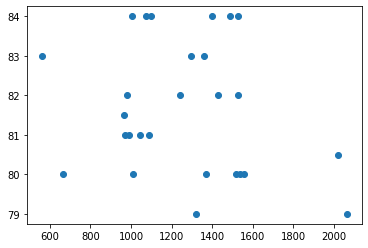

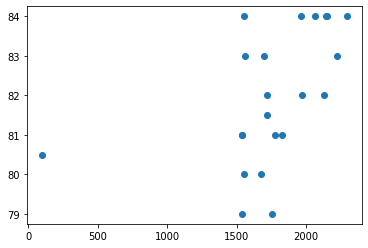

In [92]:
import matplotlib.pyplot as plt
plt.subplots()
plt.scatter(my_data['calories_in'], my_data['WeightK'])
#plt.scatter(interpolated_data['calories_in'], interpolated_data['WeightK'])
plt.show()
plt.scatter(my_data['calories_out'], my_data['WeightK'])

# Model Training and Evaluation

In [93]:
# LOalibraries
from pandas import read_csv
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold


In [156]:
# split into input (X) and output (Y) variables
X = interpolated_data.iloc[:,1:6]
Y = interpolated_data.iloc[:,6:-1]



In [157]:
#Split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=40)
print(X_train.shape); print(X_test.shape)
#convert to tensors
X_train=tf.convert_to_tensor(X_train)
y_train=tf.convert_to_tensor(y_train)
X_test=tf.convert_to_tensor(X_test)
y_test=tf.convert_to_tensor(y_test)


(210, 5)
(91, 5)


In [158]:
# Define model
model = Sequential()
model.add(Dense(500, input_dim=5, activation= "relu"))
model.add(Dense(100, activation= "relu"))
model.add(Dense(50, activation= "relu"))
model.add(Dense(1))
model.summary() #Print model Summary

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_48 (Dense)            (None, 500)               3000      
                                                                 
 dense_49 (Dense)            (None, 100)               50100     
                                                                 
 dense_50 (Dense)            (None, 50)                5050      
                                                                 
 dense_51 (Dense)            (None, 1)                 51        
                                                                 
Total params: 58,201
Trainable params: 58,201
Non-trainable params: 0
_________________________________________________________________


In [159]:
model.compile(loss= "mean_squared_error" , optimizer="adam", metrics=["mean_squared_error"])
model.fit(X_train, y_train, epochs=20)

Epoch 1/20
7/7 [==============================] - 0s 4ms/step - loss: 45852.1797 - mean_squared_error: 45852.1797
Epoch 2/20
7/7 [==============================] - 0s 4ms/step - loss: 21690.0781 - mean_squared_error: 21690.0781
Epoch 3/20
7/7 [==============================] - 0s 3ms/step - loss: 4444.5889 - mean_squared_error: 4444.5889
Epoch 4/20
7/7 [==============================] - 0s 3ms/step - loss: 2445.5669 - mean_squared_error: 2445.5669
Epoch 5/20
7/7 [==============================] - 0s 4ms/step - loss: 2025.6257 - mean_squared_error: 2025.6257
Epoch 6/20
7/7 [==============================] - 0s 4ms/step - loss: 2049.3723 - mean_squared_error: 2049.3723
Epoch 7/20
7/7 [==============================] - 0s 4ms/step - loss: 1525.7991 - mean_squared_error: 1525.7991
Epoch 8/20
7/7 [==============================] - 0s 4ms/step - loss: 1164.8130 - mean_squared_error: 1164.8130
Epoch 9/20
7/7 [==============================] - 0s 5ms/step - loss: 1234.3304 - mean_squared_error

In [160]:
from sklearn.metrics import mean_squared_error
from math import sqrt
pred_train= model.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train)))

pred= model.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred))) 

31.05581808147139
33.69374497686994


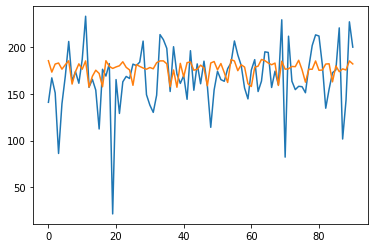

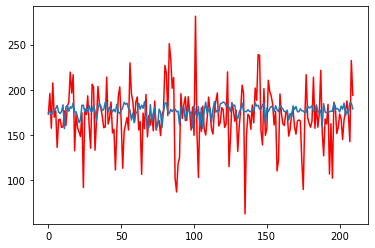

In [171]:
plt.plot(pred)
plt.plot(y_test)
plt.show()
plt.plot(pred_train, color='red')
plt.plot(y_train)
plt.show()